In [67]:
import os
import skimage as ski
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.dates as mdates

raster_dir = 'D:/werk/inbo/mbag-xee-telcirkels-mas/rasters'


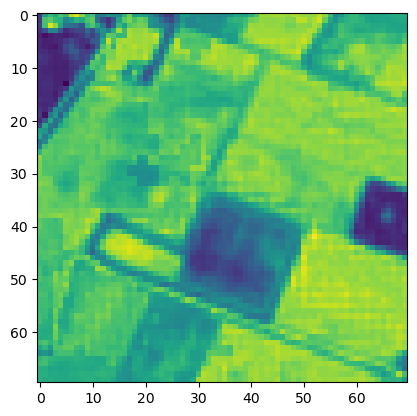

In [68]:
raster_list = os.listdir(raster_dir)

rastername = os.path.join(raster_dir, raster_list[0])
raster = ski.io.imread(rastername)
raster_test = raster[:, :, 0]

plt.imshow(raster_test)
plt.show()

In [128]:
homogeneity_list = []

for i in range(raster.shape[2]):
    # Select single band (time-step)
    raster_glcm = raster[:, :, i]

    # Values in raster range theory between -1 and 1, reprojec to
    raster_int = np.round((raster_glcm*100)+100).astype(np.uint8)

    # Compute GLCM properties for the raster
    glcm = graycomatrix(raster_int, distances=[5], angles=[0], levels=200, symmetric=True, normed=True)

    # For plotting
    homogeneity = (graycoprops(glcm, 'homogeneity')[0, 0])

    homogeneity_list.append(homogeneity)

95
95 None


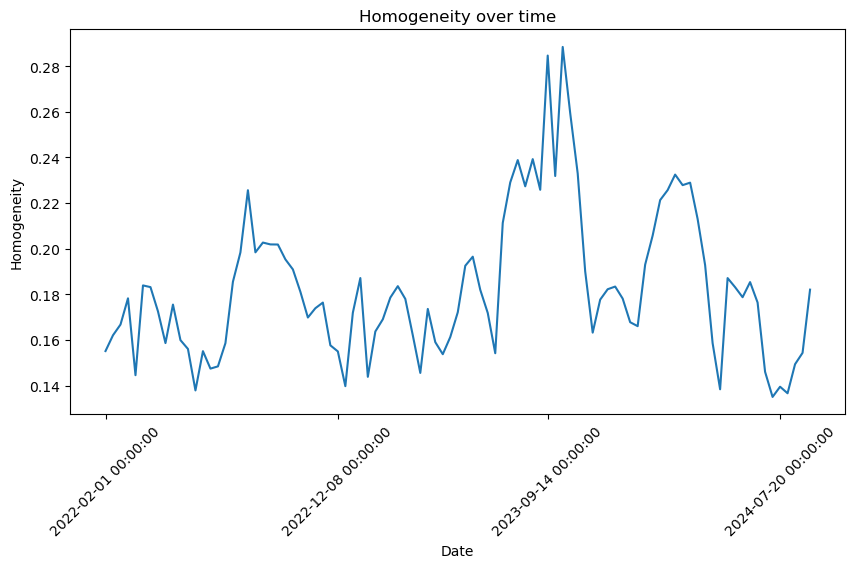

In [129]:
# Plotting the results
datelist = pd.date_range(start='2022-02-01', end='2024-08-30', freq='10D')
print(len(datelist), print(len(homogeneity_list)))

# create figure
plt.figure(figsize=(10, 5))

# reducte number of x-ticks
plt.xticks(rotation=45)
plt.xticks(ticks=np.arange(len(datelist)), labels=datelist)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13)))
plt.xlabel('Date')
plt.ylabel('Homogeneity')
plt.title('Homogeneity over time')
plt.plot(homogeneity_list)

In [ ]:
# Calculate homogeneity per year instead of per image? Like in Farwell et al 2022

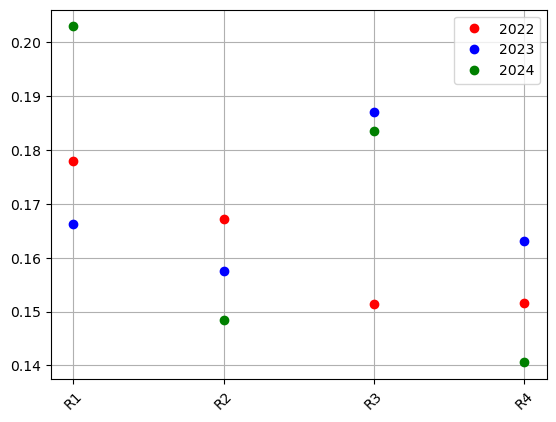

In [130]:
# Average homogeneity per period
periods = {
'R1_2022': ('2022-04-01', '2022-04-20'),
'R2_2022': ('2022-04-21', '2022-05-10'),
'R3_2022': ('2022-05-11', '2022-06-10'),
'R4_2022': ('2022-06-21', '2022-07-15'),
'R1_2023': ('2023-04-01', '2023-04-20'),
'R2_2023': ('2023-04-21', '2023-05-10'),
'R3_2023': ('2023-05-11', '2023-06-10'),
'R4_2023': ('2023-06-21', '2023-07-15'),
'R1_2024': ('2024-04-01', '2024-04-20'),
'R2_2024': ('2024-04-21', '2024-05-10'),
'R3_2024': ('2024-05-11', '2024-06-10'),
'R4_2024': ('2024-06-21', '2024-07-15')}

average_homogeneity = {}

for period, (start_date, end_date) in periods.items():
    mask = (datelist >= pd.to_datetime(start_date)) & (datelist <= pd.to_datetime(end_date))
    avg_homogeneity = np.mean(np.array(homogeneity_list)[mask])

    average_homogeneity[period] = avg_homogeneity

# Plot the 4 period averages
plt.plot(list(average_homogeneity.values())[0:4], marker='o', linestyle='None', color='r')
plt.plot(list(average_homogeneity.values())[4:8], marker='o', linestyle='None', color='b')
plt.plot(list(average_homogeneity.values())[8:12], marker='o', linestyle='None', color='g')

plt.xticks(ticks=np.arange(4), labels=['R1','R2','R3','R4'], rotation=45)
plt.legend(['2022','2023','2024'])
plt.grid()

